In [1]:
# ---------------------------------------------
# SIMPLE & CLEAN PARKINSON MODEL TRAINING (FINAL)
# Includes: Linear Regression, Logistic Regression,
# KNN, Decision Tree, Random Forest + SMOTE + Feature Importance
# ---------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, mean_squared_error, r2_score
)

# Balancing
from imblearn.over_sampling import SMOTE

In [4]:
# ---------------------------------------------
# 1. Load dataset
# ---------------------------------------------
df = pd.read_csv("D:\Guvi-Projects\Multiple Disease Project - 4\parkinsons - parkinsons.csv")
print("\nHead of the dataset:")
display(df.head())


Head of the dataset:


<>:4: SyntaxWarning: invalid escape sequence '\G'
<>:4: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Akash Subramanian\AppData\Local\Temp\ipykernel_18232\2018571951.py:4: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("D:\Guvi-Projects\Multiple Disease Project - 4\parkinsons - parkinsons.csv")


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
# ---------------------------------------------
# 2. Drop 'name' column
# ---------------------------------------------
df = df.drop(columns=["name"])


In [6]:
# ---------------------------------------------
# 3. Check null values
# ---------------------------------------------
print("\nNull values in dataset:\n", df.isnull().sum())


Null values in dataset:
 MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


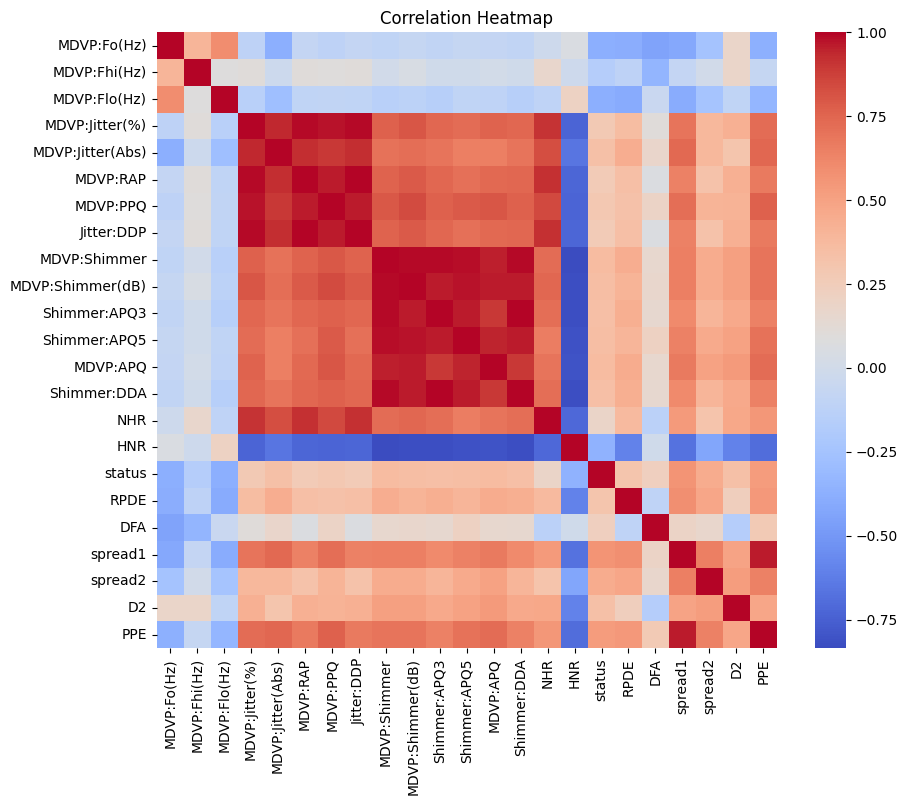

In [7]:
# ---------------------------------------------
# 4. Correlation Heatmap
# ---------------------------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


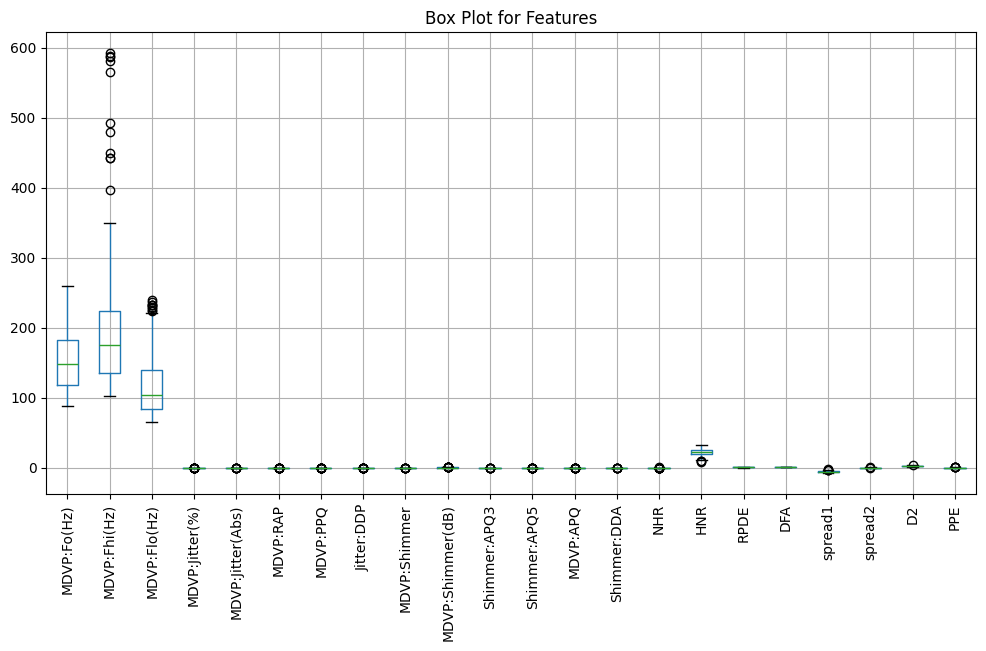

In [8]:
# ---------------------------------------------
# 5. Boxplot for all features
# ---------------------------------------------
plt.figure(figsize=(12, 6))
df.drop(columns=["status"]).boxplot()
plt.xticks(rotation=90)
plt.title("Box Plot for Features")
plt.show()


In [9]:
# ---------------------------------------------
# 6. Feature Matrix & Target
# ---------------------------------------------
X = df.drop(columns=["status"])
y = df["status"]


In [10]:
# ---------------------------------------------
# 6. Feature Matrix & Target
# ---------------------------------------------
X = df.drop(columns=["status"])
y = df["status"]

# ---------------------------------------------
# 7. Balancing using SMOTE
# ---------------------------------------------
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(y_res.value_counts())



Class distribution after SMOTE:
status
1    147
0    147
Name: count, dtype: int64


In [11]:
# ---------------------------------------------
# 8. Train–Test Split
# ---------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42
)

In [12]:
# ---------------------------------------------
# 9. Scaling
# ---------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Convert continuous output to binary (0.5 threshold)
y_pred_lr_cont = lin_reg.predict(X_test)
y_pred_lr = (y_pred_lr_cont >= 0.5).astype(int)

print("\n-------------------------------")
print("Linear Regression Results")
print("-------------------------------")
print("MSE :", mean_squared_error(y_test, y_pred_lr_cont))
print("R2 Score:", r2_score(y_test, y_pred_lr_cont))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


-------------------------------
Linear Regression Results
-------------------------------
MSE : 0.10462858109741871
R2 Score: 0.5813654128734316
Accuracy: 0.8983050847457628

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.93      0.86      0.89        29

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



In [14]:
# Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8813559322033898


In [15]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.9661016949152542


In [16]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))




Decision Tree Accuracy: 0.9491525423728814


In [17]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        29

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



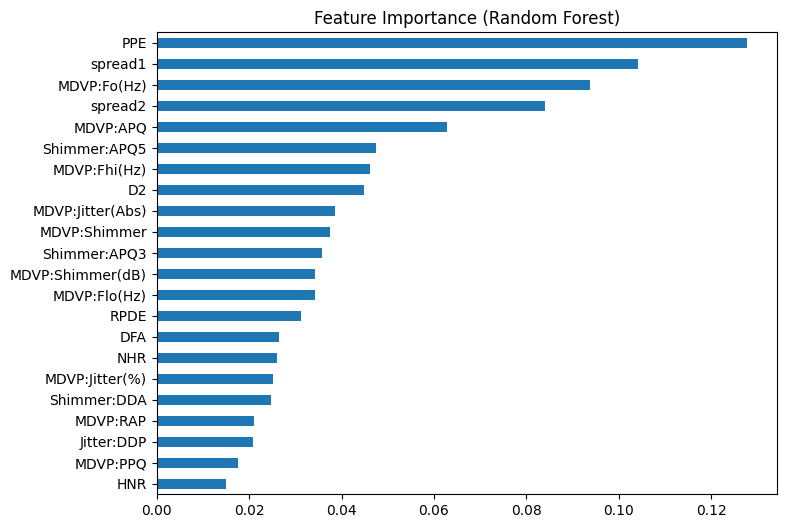

In [18]:
# ---------------------------------------------
# 11. Feature Importance (Random Forest)
# ---------------------------------------------
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8, 6))
plt.title("Feature Importance (Random Forest)")
plt.show()

In [19]:
# ---------------------------------------------
# 12. Save Model & Scaler
# ---------------------------------------------
pickle.dump(rf, open("parkinson_model.pkl", "wb"))
pickle.dump(scaler, open("parkinson_scaler.pkl", "wb"))

print("\nModel (Random Forest) and scaler saved successfully!")


Model (Random Forest) and scaler saved successfully!
